# Importation des bibliothéques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Chargement des données

## 1.2. Données APEC

In [2]:
df = pd.read_csv('Scrapped_Data/Data_APEC_all/all_data_V1_cleaned.csv')
df

,entreprise,type_contrat,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,zone_de_deplacement,...,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise,nombre_posts,duree,ville,code_postal,departement
0,MICHAEL PAGE INTERNATIONAL FRANCE,CDI,2024-02-29,2024-02-29,40.0,Dès que possible,0,Développeur,Cadre du secteur privé,Pas de déplacement,...,"De formation supérieure en informatique, vous ...",Aucune langue attendue,"['Autonomie', ""Capacité d'analyse"", 'Capacité ...","['Application Web', 'Développement web', 'Info...",Notre client est un éditeur de logiciels dans ...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
1,Charlotte Drahy sas,CDI,2024-01-17,2024-03-15,40.0,Dès que possible,5,Développeur,Cadre du secteur privé,Nationale,...,Les compétences requises sont :\nProgrammation...,"Anglais, Français","[""Esprit d'équipe"", 'Motivation', 'Rigueur']","['Analyse des besoins', 'Analyse fonctionnelle...","""Charlotte Drahy sas"" est une société de conse...",1,NaN,Aubagne,13,Bouches-du-Rhône
2,LOEMA,CDI,2024-02-22,2024-02-22,47.5,Dès que possible,4,Développeur,Cadre du secteur privé,Pas de déplacement,...,Vous avez une expérience en : \n- Programma...,Aucune langue attendue,"['Curiosité', 'Goût du challenge']","['ASP.NET', 'Bootstrap Protocol', 'C sharp', '...",Situé au cœur même de la ville de Marseille no...,1,NaN,Marseille,13,Bouches-du-Rhône
3,CELAD,CDI,2024-02-29,2024-02-29,36.0,Dès que possible,1,Développeur,Cadre du secteur privé,Pas de déplacement,...,"Idéalement ingénieur de formation, vous justif...",Aucune langue attendue,"['Autonomie', 'Force de proposition', 'Qualité...","['Framework', 'JavaScript', 'ReactJS', 'TypeSc...","Issu du monde bancaire, #CELAD a été créée en ...",1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
4,EASY PARTNER,CDI,2024-03-01,2024-03-01,40.0,Dès que possible,3,Développeur,Cadre du secteur privé,Pas de déplacement,...,Profil recherché\nNous recherchons un profil a...,Aucune langue attendue,"['Ambition', 'Autonomie', 'Bienveillance', 'Ca...","['Nuxt', 'Vue.js', 'Développement web', 'React...",Easy Partner est un Cabinet de recrutement dig...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,Seyos,CDI,2024-03-15,2024-03-15,52.5,Dès que possible,5,Business developer,Cadre du secteur privé,Pas de déplacement,...,Profil recherché :\nVous avez une expérience s...,Aucune langue attendue,"['Force de proposition', 'Proactivité']","['Manutention', 'Automatisme', 'Cahier des cha...",Seyos est un cabinet de recrutement spécialisé...,1,NaN,Tonneins,47,Lot-et-Garonne
8038,LES COLETTES,CDI,2024-03-12,2024-03-12,NaN,Dès que possible,2,Ingénieur test et recettes,Cadre du secteur privé,Pas de déplacement,...,"Issu(e) d'une formation en informatique, idéal...",Aucune langue attendue,"[""Esprit d'équipe""]","['Cloud', 'Jira', 'SAAS', 'Algorithme', 'Autom...",Editeur de logiciels français multi-sectoriel ...,1,NaN,Villeneuve-sur-Lot,47,Lot-et-Garonne
8039,Armée de l'Air et de l'Espace,CDD,2024-02-21,2024-02-21,34.0,Dès que possible,0,Consultant en cybersécurité,Cadre du secteur public / Armées,Nationale,...,"Jeune diplômé, avec ou sans expérience profess...",Anglais,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne
8040,Armée de l'Air et de l'Espace,CDD,2024-02-16,2024-02-16,22.5,Dès que possible,0,Responsable sécurité informatique,Cadre du secteur public / Armées,Nationale,...,"Diplômé, avec ou sans expérience professionnel...",Anglais,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne


In [3]:
df.shape

(8042, 23)

In [4]:
df.dtypes

entreprise                object
type_contrat              object
date_publication          object
date_mise_a_jour          object
salaire                  float64
prise_de_poste            object
experience                 int64
metier                    object
statut_du_poste           object
zone_de_deplacement       object
secteur_d_activite        object
Teletravail               object
descriptif_poste          object
profil_recherche          object
langues                   object
savoir_etre               object
savoir_faire              object
descriptif_entreprise     object
nombre_posts               int64
duree                     object
ville                     object
code_postal               object
departement               object
dtype: object

In [5]:
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                  3831
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "salaire" avec la moyenne correspondante pour chaque département

In [6]:
moyenne_salaire_par_departement = df.groupby("departement")["salaire"].mean().reset_index()
moyenne_salaire_par_departement.isna().sum()

departement    0
salaire        7
dtype: int64

### Remplacer les valeurs NaN par la moyenne générale des salaires

In [7]:
moyenne_generale_salaire = df["salaire"].mean()
moyenne_salaire_par_departement["salaire"].fillna(moyenne_generale_salaire, inplace=True)
moyenne_salaire_par_departement


,departement,salaire
0,Ain,44.107143
1,Aisne,41.333333
2,Allier,38.833333
3,Alpes-Maritimes,43.045455
4,Alpes-de-Haute-Provence,46.206720
...,...,...
90,Vendée,42.477273
91,Vienne,45.300000
92,Vosges,43.500000
93,Yonne,46.206720


In [8]:
for dep in moyenne_salaire_par_departement["departement"].unique() :
    mask = df["departement"] == dep
    new_salaire = moyenne_salaire_par_departement.loc[moyenne_salaire_par_departement["departement"] == dep, "salaire"].iloc[0]
    df.loc[mask, "salaire"] = df.loc[mask, "salaire"].fillna(new_salaire)

df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "Teletravail" avec la categorie "non specifié":

In [9]:
df['Teletravail'] = df['Teletravail'].fillna('non spécifié')
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail                 0
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

## Remplacer des valeurs

In [10]:
# Définir une fonction pour remplacer les valeurs
liste_valeurs_autorisees= ['CDI', 'CDD', "Mission d'intérim"]
def remplacer_par(valeur):
    if valeur in liste_valeurs_autorisees:
        return valeur
    else:
        return 'Alternance'

# Appliquer la fonction à la colonne
df['type_contrat'] = df['type_contrat'].apply(remplacer_par)

df['type_contrat'].unique()


array(['CDI', 'CDD', "Mission d'intérim", 'Alternance'], dtype=object)

## Selection de features : 

In [25]:
df.columns

Index(['entreprise', 'type_contrat', 'date_publication', 'date_mise_a_jour',
       'salaire', 'prise_de_poste', 'experience', 'metier', 'statut_du_poste',
       'zone_de_deplacement', 'secteur_d_activite', 'Teletravail',
       'descriptif_poste', 'profil_recherche', 'langues', 'savoir_etre',
       'savoir_faire', 'descriptif_entreprise', 'nombre_posts', 'duree',
       'ville', 'code_postal', 'departement'],
      dtype='object')

In [62]:
df_filtred = df[[ 'type_contrat', 
       'salaire', 'experience', 'metier',
       'zone_de_deplacement',  'Teletravail',
       'departement']]

In [63]:
df_filtred['experience'] = df_filtred['experience'].astype(str)


<ipython-input-63-96e467186890>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred['experience'] = df_filtred['experience'].astype(str)


In [42]:
df_filtred.dtypes

type_contrat            object
salaire                float64
experience              object
metier                  object
statut_du_poste         object
zone_de_deplacement     object
Teletravail             object
departement             object
dtype: object

In [39]:
df_filtred = df[[ 'type_contrat', 
       'salaire', 'experience', 'metier', 'statut_du_poste',
       'zone_de_deplacement',  'Teletravail',
       'departement']]

In [69]:
df['statut_du_poste'].unique()

array(['Cadre du secteur privé', 'Agent de maîtrise / Technicien',
       'Cadre du secteur public / Armées'], dtype=object)

In [77]:
# Créer un dictionnaire de remplacement
mapping = {'Cadre du secteur privé': 0, 'Agent de maîtrise / Technicien': 1, 'Cadre du secteur public / Armées': 2}

# Remplacer les valeurs dans la colonne 'statut_du_poste'
verite_terrain = df['statut_du_poste'].replace(mapping)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
for col in df_filtred.select_dtypes(include=['object']).columns:
    df_filtred.loc[:, col] = label_encoder.fit_transform(df_filtred[col])


# Prétraitement des données : mise à l'échelle des attributs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtred)

### Elbow method : 


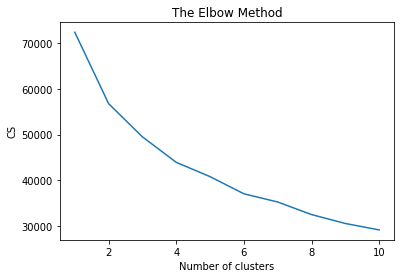

In [81]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

On remarque un leger kink au nieau de 3 (on a 3 classe en realité) Mais l'inetrie reste assez grande.

/home/djeghali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


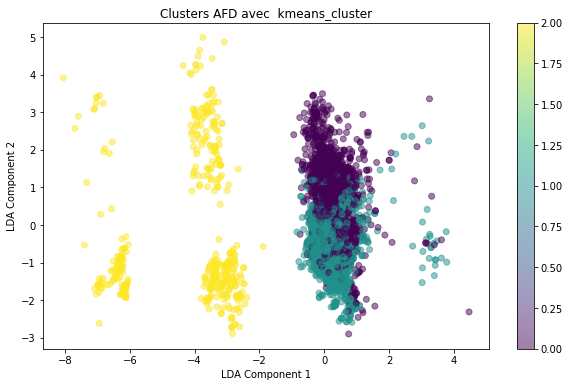

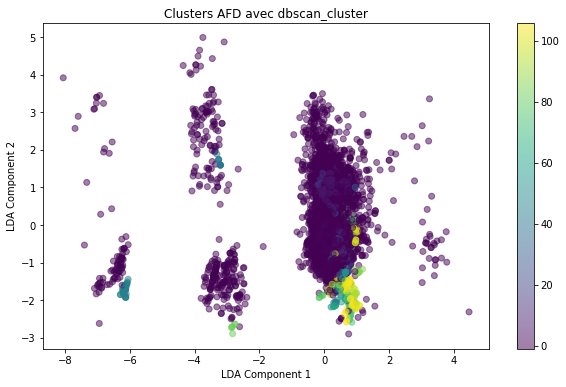

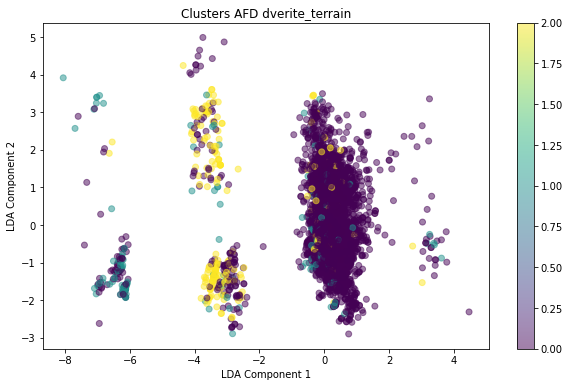

Silhouette Score: 0.27452721966361887
Calinski-Harabasz Score: 1858.2271205187835
Davies-Bouldin Score: 1.4288826952055793


In [80]:


# Clustering avec K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df_filtred.loc[:, 'kmeans_cluster'] = kmeans.labels_

# Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_filtred.loc[:, 'dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Analyse Factorielle Discriminante (AFD)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, df['statut_du_poste'])

# Afficher les clusters obtenus avec l'AFD
plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=df_filtred['kmeans_cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters AFD avec  kmeans_cluster')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar()
plt.show()



# Afficher les clusters obtenus avec l'AFD
plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=df_filtred['dbscan_cluster'] , cmap='viridis', alpha=0.5)
plt.title('Clusters AFD avec dbscan_cluster')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar()
plt.show()

# Afficher les clusters obtenus avec l'AFD
plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=verite_terrain , cmap='viridis', alpha=0.5)
plt.title('Clusters AFD dverite_terrain')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar()
plt.show()


silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Calculer le Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, kmeans.labels_)
print("Calinski-Harabasz Score:", calinski_harabasz_avg)

# Calculer le Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies-Bouldin Score:", davies_bouldin_avg)

## AVce reduction de dimension préalable : 

In [83]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

# Clustering avec K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)
kmeans_labels = kmeans.labels_
print("K-means Silhouette Score:", silhouette_score(data_pca, kmeans_labels))

# Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_pca)
dbscan_labels = dbscan.labels_
print("DBSCAN Silhouette Score:", silhouette_score(data_pca, dbscan_labels))


/home/djeghali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means Silhouette Score: 0.5107623732548165
DBSCAN Silhouette Score: 0.6389576542197017


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# True labels (vrais labels)
true_labels = ... # Vos vrais labels pour chaque échantillon

# Predicted labels from clustering models (labels prédits par les modèles de clustering)
kmeans_predicted_labels = kmeans.predict(data_pca)
dbscan_predicted_labels = dbscan.labels_

# Comparez les prédictions des clusters avec les vrais labels en utilisant des métriques d'évaluation de la classification
print("K-means Accuracy:", accuracy_score(verite_terrain, kmeans_predicted_labels))
print("K-means Precision:", precision_score(verite_terrain, kmeans_predicted_labels, average='weighted'))
print("K-means Recall:", recall_score(verite_terrain, kmeans_predicted_labels, average='weighted'))
print("K-means F-score:", f1_score(verite_terrain, kmeans_predicted_labels, average='weighted'))

print("DBSCAN Accuracy:", accuracy_score(verite_terrain, dbscan_predicted_labels))
print("DBSCAN Precision:", precision_score(verite_terrain, dbscan_predicted_labels, average='weighted'))
print("DBSCAN Recall:", recall_score(verite_terrain, dbscan_predicted_labels, average='weighted'))
print("DBSCAN F-score:", f1_score(verite_terrain, dbscan_predicted_labels, average='weighted'))


K-means Accuracy: 0.19398159661775677
K-means Precision: 0.7767105131629456
K-means Recall: 0.19398159661775677
K-means F-score: 0.29908910703177705
DBSCAN Accuracy: 0.928624720218851
DBSCAN Precision: 0.8659063902053161
DBSCAN Recall: 0.928624720218851
DBSCAN F-score: 0.8961695616968871


/home/djeghali/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/djeghali/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DBSCAN est meilleur !